# **E-COMMERCE CUSTOMER CHURN**
### Created By : Muhammad Zulfiqar

## **Business Problem Understanding**

**Business Context:**

Perusahaan e-commerce, dalam upaya memahami dan mengatasi tantangan customer churn, telah mengidentifikasi kebutuhan mendesak untuk menerapkan solusi machine learning. Mereka menyadari bahwa kehilangan pelanggan dapat berdampak negatif terhadap pendapatan dan reputasi mereka. Oleh karena itu, perusahaan berkomitmen untuk mengidentifikasi pelanggan yang berpotensi berhenti berlangganan, memprediksi perilaku churn, dan mengimplementasikan strategi pencegahan yang efektif. Divisi Big Data perusahaan ingin mengidentifikasi pelanggan yang berpotensi churn untuk memberikan tawaran khusus dan mencegah kehilangan pelanggan.

<p>Target :</p>
<p>0 : Pelanggan Tidak Churn</p>
<p>1 : Pelanggan Churn</p>

**Problem Statement:**

Bagaimana kita dapat mengoptimalkan strategi pencegahan churn di platform e-commerce? Tujuan utama adalah menggunakan machine learning untuk memprediksi perilaku customer churn, mengidentifikasi faktor-faktor yang berkontribusi, dan memberikan penawaran khusus guna mempertahankan loyalitas pelanggan.

**Goals:**

- Membangun model machine learning yang dapat memprediksi customer churn dengan akurasi tinggi.
- Mengidentifikasi faktor-faktor yang berkontribusi terhadap customer churn melalui analisis data pelanggan.
- Menerapkan strategi pemasaran khusus untuk mempertahankan pelanggan yang berpotensi churn.
- Mengurangi tingkat churn melalui tindakan pencegahan yang ditargetkan.
- Meningkatkan retensi pelanggan dan kepuasan pelanggan secara keseluruhan.

**Analytic Approach:**

Pertama, melakukan analisis eksploratif data untuk memahami tren dan pola perilaku pelanggan. Selanjutnya, membangun model klasifikasi menggunakan algoritma machine learning seperti Random Forest, XGBoost, atau Neural Networks. Melibatkan analisis interpretasi model untuk mengidentifikasi fitur-fitur kunci yang mempengaruhi keputusan pelanggan. Akhirnya, merancang strategi pemasaran berdasarkan wawasan yang diperoleh untuk meningkatkan retensi pelanggan.

**Business Impact:**

Mengurangi biaya rekrutmen dan pelatihan dengan fokus pada kandidat yang lebih mungkin bertahan.
Meningkatkan efisiensi rekrutmen dengan strategi yang lebih terarah.
Menyesuaikan pelatihan agar sesuai dengan kebutuhan kandidat yang diinginkan oleh perusahaan.

**Metrics Evaluation**


![alt text](https://www.researchgate.net/publication/328148379/figure/fig1/AS:679514740895744@1539020347601/Model-performance-metrics-Visual-representation-of-the-classification-model-metrics.png)


- *(TP) True Positive*: Pelanggan diprediksi (predict) churn dan aktualnya (actual) benar-benar churn.
- *(FP) False Positive*: Pelanggan diprediksi (predict) churn, tetapi sebenarnya (actual) tidak churn.
- *(FN) False Negative*: Pelanggan diprediksi (predict) TIDAK churn, tetapi sebenarnya (actual) churn.
- *(TN) True Negative*: Pelanggan diprediksi (predict) TIDAK churn dan sebenarnya (actual) TIDAK churn.

<p>Type 1 error :  False Negatif <br> Konsekuensi: Pelanggan benar-benar churn, efek sampingnya perusahaan harus mencari pelanggan baru dengan cara iklan. </p>
<p>Type 2 error : False Positif <br> Konsekuensi: Perusahaan sia-sia memberikan biaya program loyalitas pada pelanggan yang tidak churn, efek sampingnya perusahaan kehilangan uang untuk promosi.</p>


Karena probabilitas prediksi yang salah di atas, model yang dibuat harus mampu meminimalkan kerugian pendapatan perusahaan akibat kehilangan pelanggan dengan menekan **false negative (FN)**, sehingga perusahaan dapat dipertahankan untuk menghindari biaya yang tidak sesuai dalam memberikan promosi (menghindari false positive). Oleh karena itu, **F2 score** akan digunakan. menurut referensi , Nilai 
- Acusition akun untuk tidak churn 5 sampai 25x
- sedangkan biaya retention $5 perbulan perakunnya

**F2 score** adalah salah satu metrik evaluasi untuk klasifikasi yang mengukur akurasi model dengan mempertimbangkan trade-off antara *presisi dan recall*. **F2 score** berdasarkan skor beta di mana jika skor beta lebih besar dari 1, itu akan memprioritaskan recall daripada presisi. F2 score dapat digunakan untuk mengevaluasi kinerja model klasifikasi di mana kesalahan dari false negative lebih dapat dipertimbangkan daripada menghindari false positive. Menggunakan F2 karena perbandingan itu 2x lebih banyak sedikit

## **Data Understanding**

Dataset source :

### **Attribute Information**

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Tenure | float | Tenure of a customer in the company |
| WarehouseToHome | float | Distance between the warehouse to the customer’s home |
| NumberOfDeviceRegistered | int | Total number of deceives is registered on a particular customer |
| PreferedOrderCat | object | Preferred order category of a customer in the last month |
| SatisfactionScore | int | Satisfactory score of a customer on service |
| MaritalStatus | object | Marital status of a customer |
| NumberOfAddress | int | Total number of added on a particular customer |
| Complain | int | Any complaint has been raised in the last month | 
| DaySinceLastOrder | float | Day since last order by customer |
| CashbackAmount | float | Average cashback in last month |
| churn | int | Churn flag |

In [84]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


# import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, fbeta_score, make_scorer
# from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve # (ini apa)

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [85]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [87]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[0.0, 23.0]"
1,WarehouseToHome,float64,169,4.29,33,"[10.0, 36.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[5, 4]"
3,PreferedOrderCat,object,0,0.00,6,"[Fashion, Mobile Phone]"
4,SatisfactionScore,int64,0,0.00,5,"[1, 3]"
5,MaritalStatus,object,0,0.00,3,"[Married, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[5, 19]"
7,Complain,int64,0,0.00,2,"[1, 0]"
8,DaySinceLastOrder,float64,213,5.40,22,"[nan, 15.0]"
9,CashbackAmount,float64,0,0.00,2335,"[129.96, 222.13]"


## **Explanatory Data Analysis**

### **Categorical Feature**

#### **Descriptive Statistic**

In [88]:
df.describe(include='object').T

,count,unique,top,freq
PreferedOrderCat,3941,6,Laptop & Accessory,1458
MaritalStatus,3941,3,Married,2055


In [89]:
categorical_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
categorical_features

['PreferedOrderCat', 'MaritalStatus']

In [90]:
for column in categorical_features:
    print(f'Nilai Unique {column}: ', df[column].unique())

Nilai Unique PreferedOrderCat:  ['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']
Nilai Unique MaritalStatus:  ['Single' 'Married' 'Divorced']


#### **Proporsi Data Feature Kategorikal**

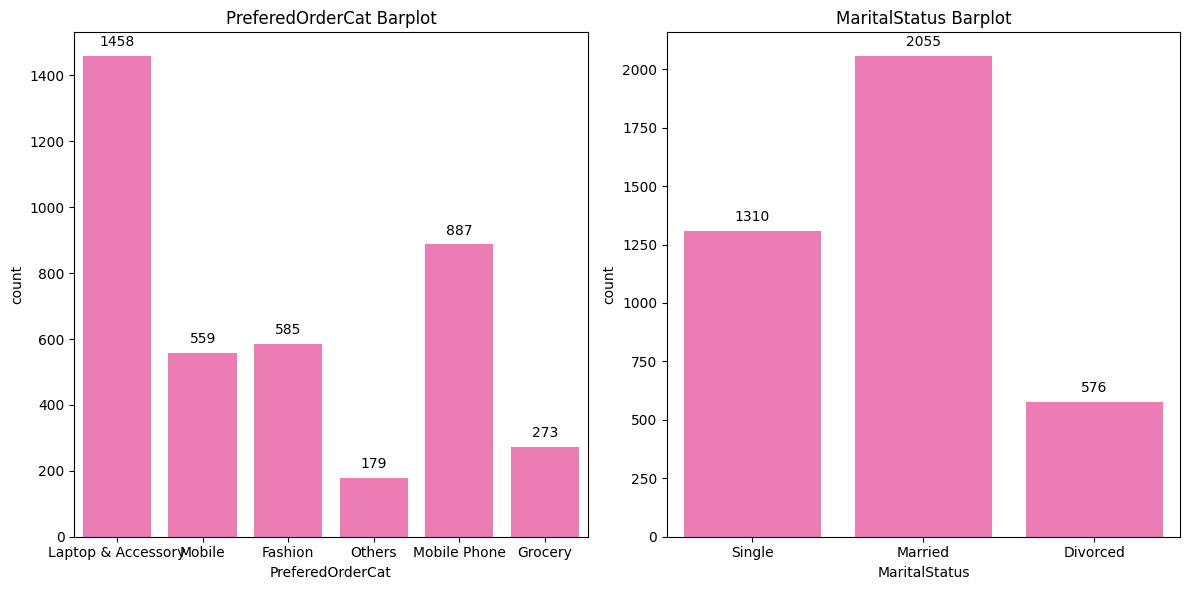

In [91]:

# Menggunakan enumerate untuk iterasi melalui kolom kategorikal
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, category_column in enumerate(categorical_features):
    ax = sns.countplot(x=category_column, data=df, color='hotpink', ax=axes[i])
    container = ax.containers[0]
    ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
    axes[i].set_title(f'{category_column} Barplot')

plt.tight_layout()
plt.show()

In [92]:
PreferedOrderCat =df['PreferedOrderCat'].value_counts() * 100 / len(df['PreferedOrderCat'])
MaritalStatus = df['MaritalStatus'].value_counts() * 100 / len(df['MaritalStatus'])

display(PreferedOrderCat, MaritalStatus)

PreferedOrderCat
Laptop & Accessory    36.995686
Mobile Phone          22.506978
Fashion               14.843948
Mobile                14.184217
Grocery                6.927176
Others                 4.541994
Name: count, dtype: float64

MaritalStatus
Married     52.144126
Single      33.240294
Divorced    14.615580
Name: count, dtype: float64

Berdasarkan Data Visualisasi diatas dapat tijinjau bahwa

- Pada Preffered Order Cat
    - Customers E-commerce paling banyak berbelanja Laptop & Accesory Sebanyak 1458 kali dengan proporsi 36.99% dari keseluruhan kategori data 'PreferedOrderCat'
    - Jenis Barang yang paling banyak dibeli kedua merupakan Mobile (Phone) Sebanyak 1446 kali dengan proporsi 36.69% dari keseluruhan kategori data 'PreferedOrderCat' berbeda sedikit dengan Laptop&Accessory
    - Jenis Kategori Other adalah yang paling sedikit dibeli customer hanya 179 kali dengan proporsi 4.54% saja

- Marital Status
    - Customers E-comeerce dengan marital status terbanyak merupakan Customers dengan kategori Married sebanyak 2055 Orang dengan proposi 52%
    - Di urutan kedua merupakan kategori single sebanyak 1310 orang dengan proposri 33%
    - Kategori Disvorced merupakan yang paling sedikit sebanyak 576 dengan proporsi 14.6%

### **Nummerical Feature**

#### **Descriptive Statistic**

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,3747.0,10.081398,8.498864,0.0,2.0,9.00,16.00,61.00
WarehouseToHome,3772.0,15.650583,8.452301,5.0,9.0,14.00,21.00,127.00
NumberOfDeviceRegistered,3941.0,3.679269,1.013938,1.0,3.0,4.00,4.00,6.00
SatisfactionScore,3941.0,3.088302,1.381832,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3941.0,4.237757,2.626699,1.0,2.0,3.00,6.00,22.00
Complain,3941.0,0.282416,0.450232,0.0,0.0,0.00,1.00,1.00
DaySinceLastOrder,3728.0,4.531652,3.667648,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3941.0,176.707419,48.791784,0.0,145.7,163.34,195.25,324.99
Churn,3941.0,0.171023,0.376576,0.0,0.0,0.00,0.00,1.00


In [94]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Churn']))]
numerical_features

['Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount']

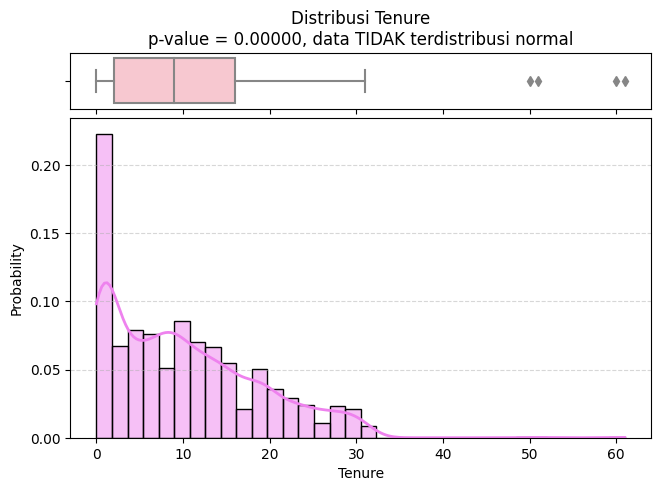

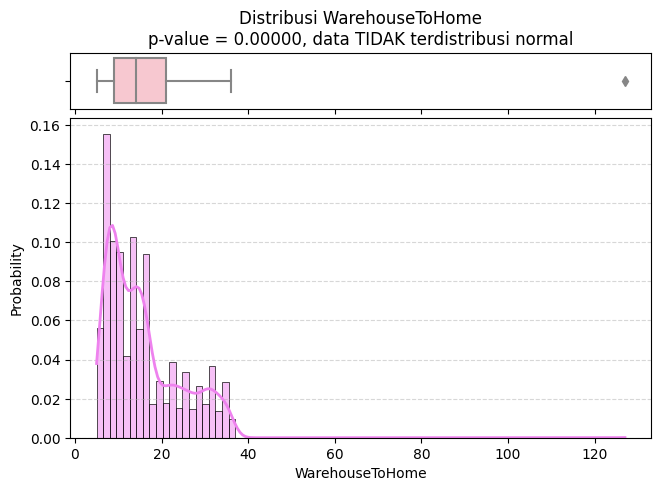

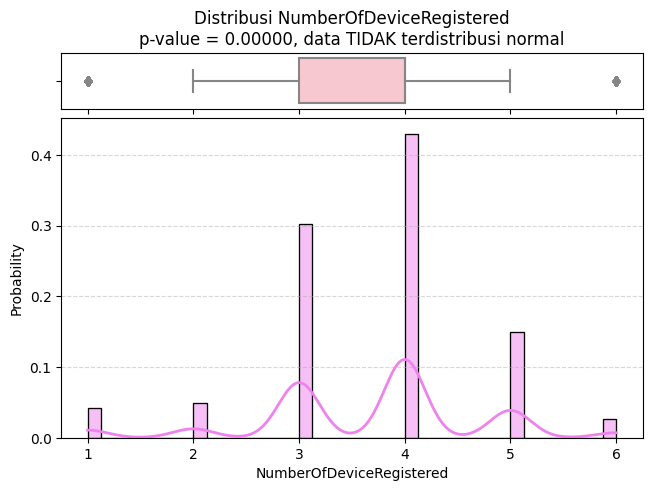

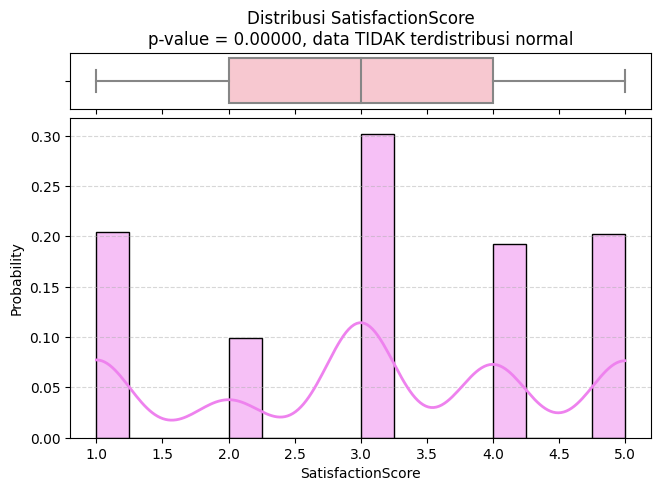

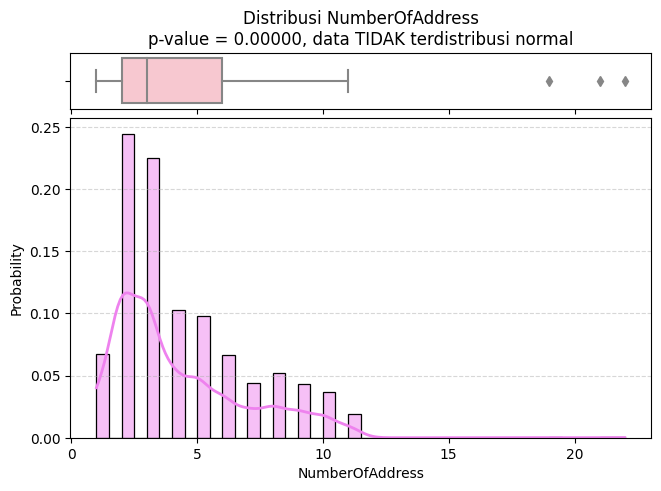

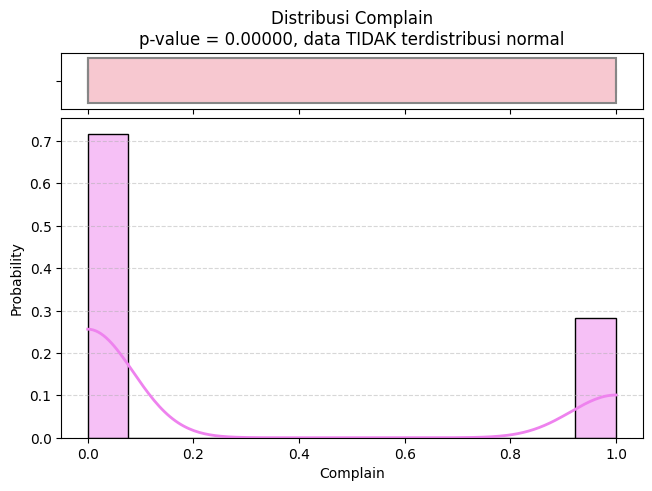

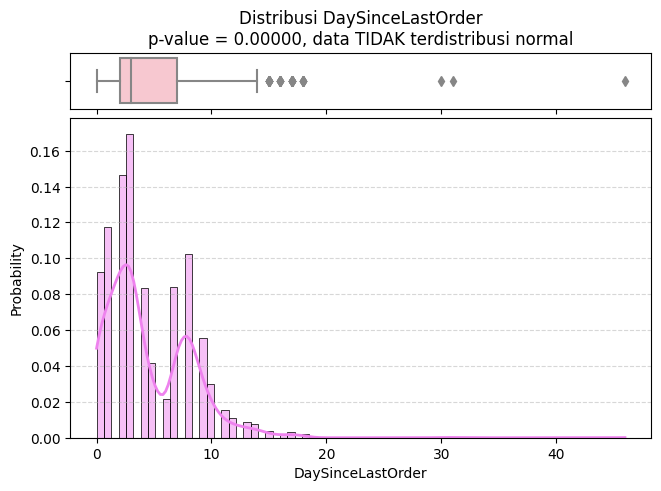

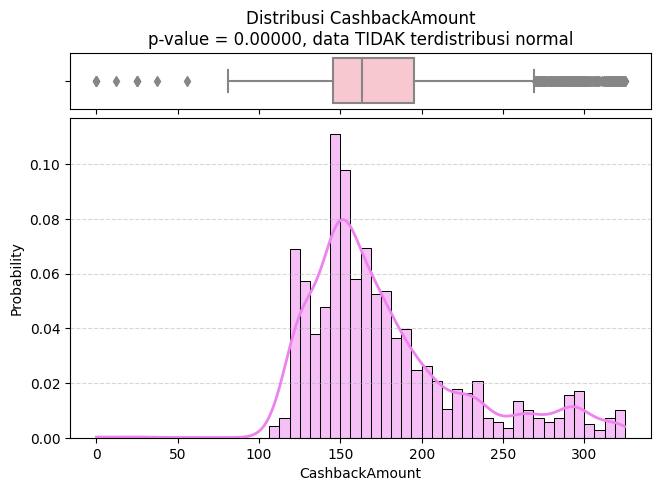

In [95]:
from scipy.stats import normaltest
plotnumber = 1
for kolom in numerical_features:
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5, 5),
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    # Uji normalitas
    stat, pvalue = normaltest(df[kolom].dropna())
    if pvalue > 0.05:
        distribusi = f'p-value = {pvalue:.5f}, data terdistribusi normal'
    else:
        distribusi = f'p-value = {pvalue:.5f}, data TIDAK terdistribusi normal'

    # Menambahkan judul dengan informasi uji normalitas
    ax1.set_title(f"Distribusi {kolom}\n{distribusi}", color="black")
    
    # Mengatur warna pada boxplot
    sns.boxplot(x=df[kolom], ax=ax1, color='pink')
    ax1.set(xlabel="")

    # Mengatur palet warna dan elemen desain pada histogram
    sns.histplot(data=df[kolom], ax=ax2, stat="probability", kde=True, color='violet', line_kws={'linewidth': 2})

    # Menampilkan grid lines pada histogram
    ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()


Dari Data di atas diketahui seluruh kolom numerikal memiliki persebaran data yang tidak normal

##### **Cek Koreleasi Antara Feature Numerikal**

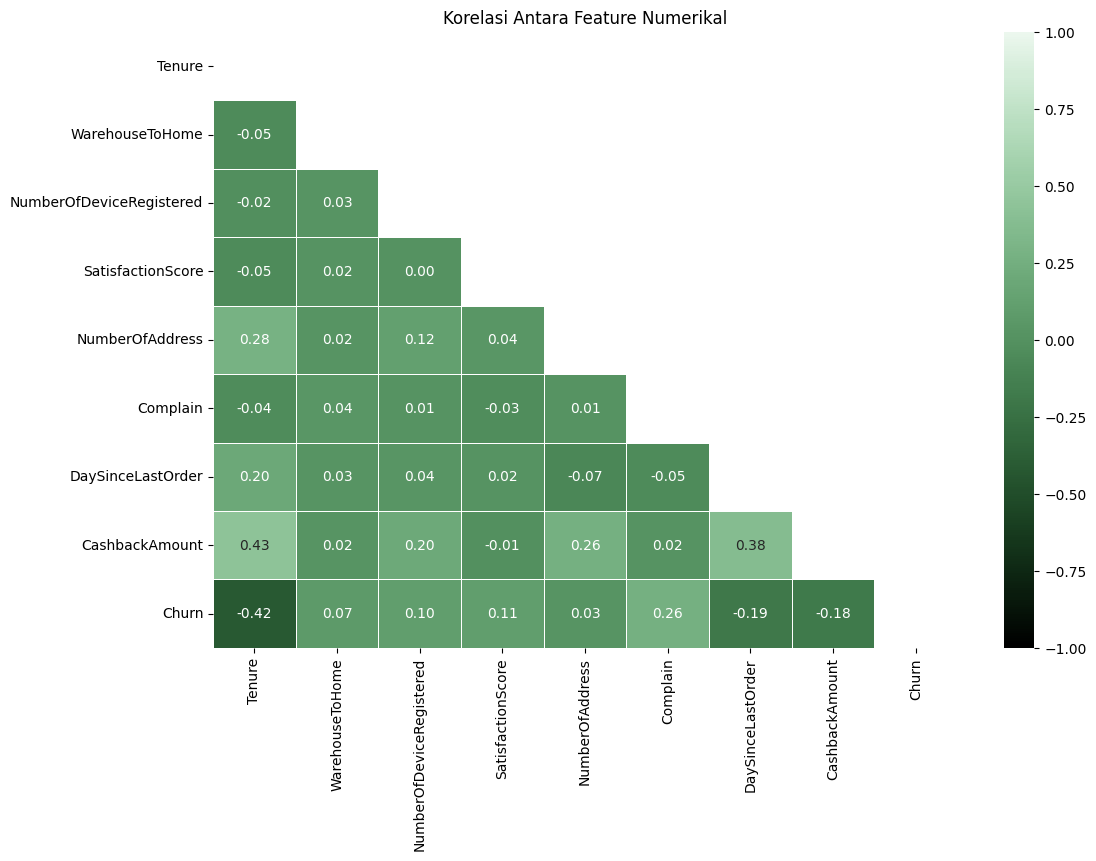

In [96]:
correlation = df.corr(method='spearman', numeric_only=True)
color = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
matrix = np.triu(correlation)

plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap=color, linewidths=.5, fmt=".2f", vmin=-1, vmax=1, mask=matrix)
plt.title("Korelasi Antara Feature Numerikal")
plt.show()


## **Data Cleaning**

Ada data yang hilang/kosong dibeberapa fitur/kolom, kemudian fitur/kolom enrolle_id tidak berguna untuk analisis dan modeling, maka kita akan memperbaiki semua datanya dan membuatnya menjadi siap pakai untuk melakukan analisa terhadap masalahnya dan juga pembuatan model machine learningnya.

**Cek Missing Values**

In [97]:
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

Ada beberapa missing values dan tidak akan didrop dengan pertimbangan akan di cek lebih baik diisi menggunakan imputer atau di drop

<Axes: >

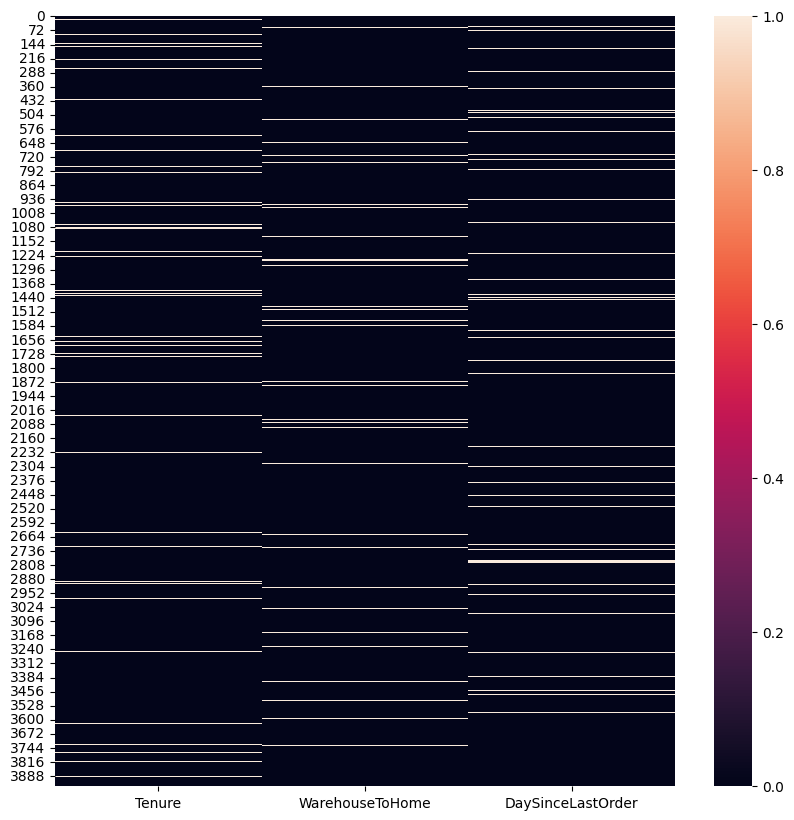

In [98]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']].isna())

Terlihat bahwa missing value/data yang hilang pada setiap kolom memiliki pola yang cukup acak dengan total data 3941 baris.

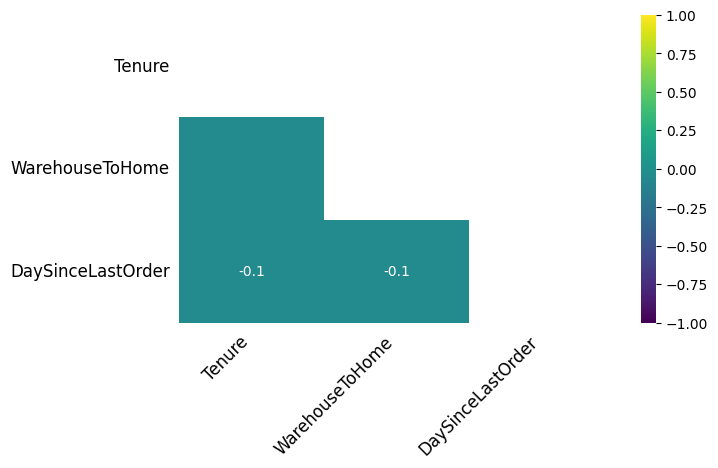

In [99]:
missingno.heatmap(df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']], cmap="viridis", figsize=(7,4), fontsize=12);

**Cek Data Duplikat**

In [100]:
df.duplicated().sum()

671

In [101]:
df = df.drop_duplicates()

In [102]:
#Persentase Data duplikat
df.duplicated().sum() / len(df)

0.0

Ada sekitar data duplikat sebanyak 17% . Dari data duplikat tersebut akan dicoba modeling menggunakan data duplikat dan tidak untuk mengetahui apakah lebih baik di drop atau tidak.
Karena dikhawatirkan data duplikat tersebut bukanlah data duplikat tapi merupakan order yang secara kebetulan sama karena tidak ada pemisah seperti id ataupun rekap lain ataupun merupakan pembelian berulang.

Namun untuk mengurangi belajar dari data yang sama membuat model kurang baik dipakai ke test set maka di drop

##### **Handling Outlier**

In [103]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,Tenure,-19.000,37.000,0,3106,4,0.12
1,WarehouseToHome,-7.500,36.500,0,3134,1,0.03
2,NumberOfDeviceRegistered,1.500,5.500,137,3044,89,6.91
3,SatisfactionScore,-1.000,7.000,0,3270,0,0.00
4,NumberOfAddress,-4.000,12.000,0,3267,3,0.09
5,Complain,-1.500,2.500,0,3270,0,0.00
6,DaySinceLastOrder,-5.500,14.500,0,3049,40,1.22
7,CashbackAmount,69.025,274.005,9,3017,244,7.74


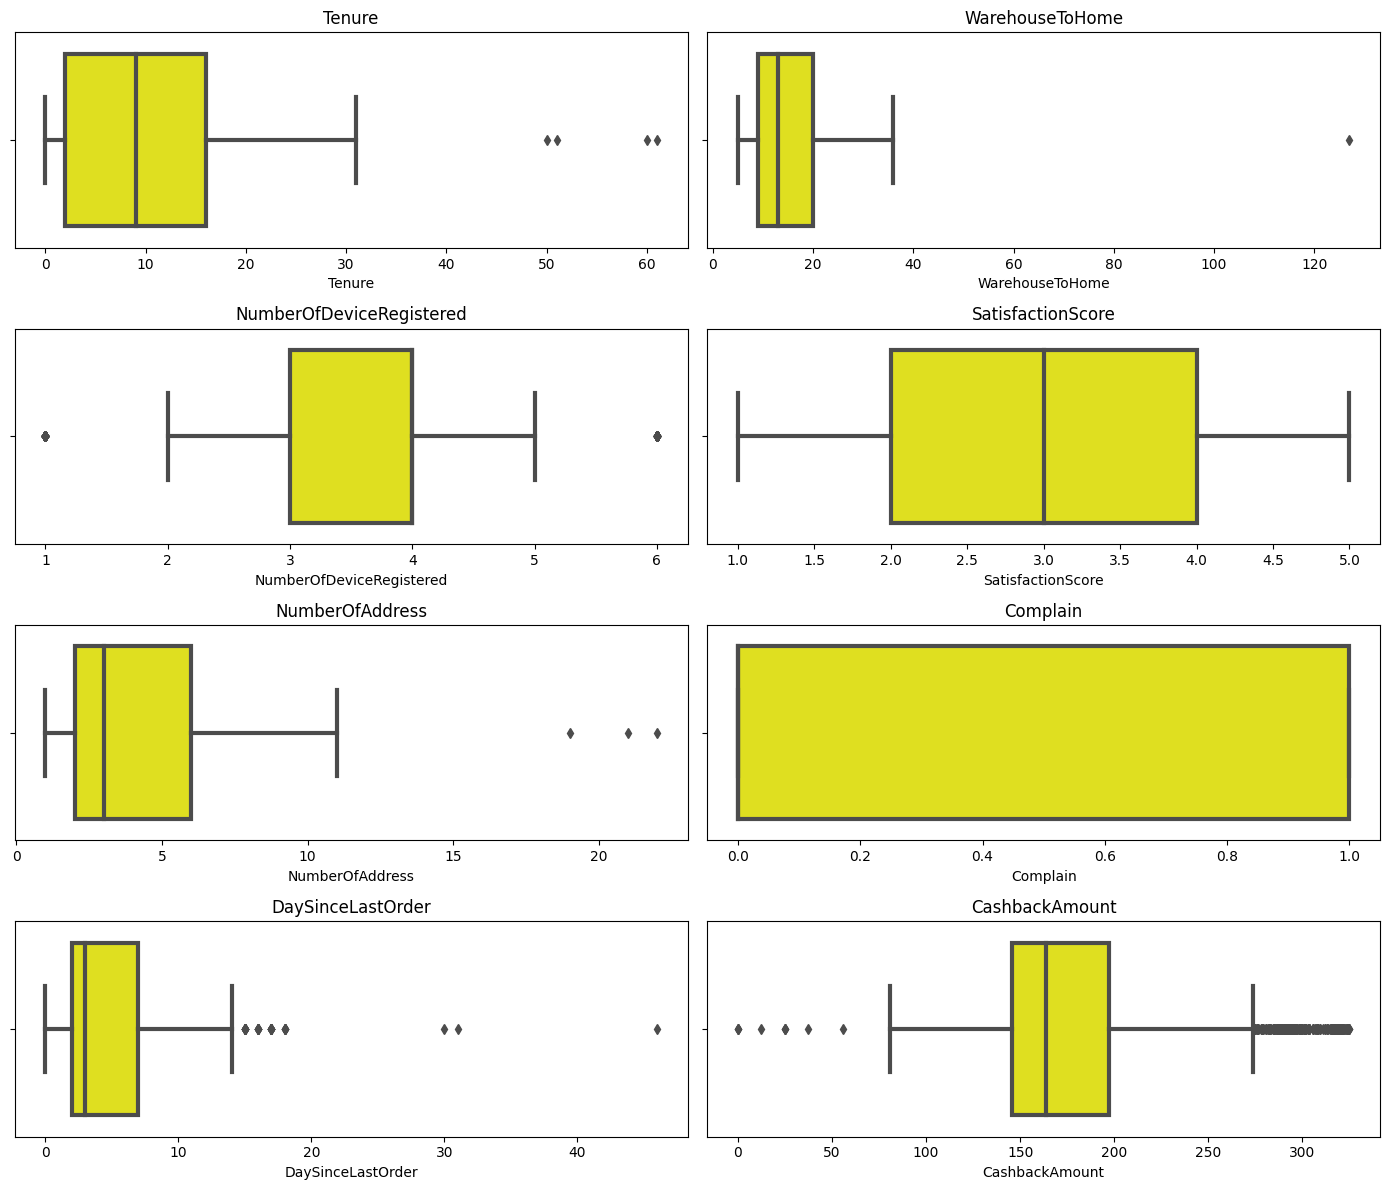

In [104]:
col_names = numerical_features
plotnumber = 1
plt.figure(figsize=(14,12))

for kolom in col_names:
    plt.subplot(4,2, plotnumber)
    sns.boxplot(data=df, x=kolom, color='yellow', linewidth= 3)
    plt.title(kolom)
    plt.tight_layout()

    plotnumber += 1

Kebanyakan data numerikal memiliki outlier tapi masih dalam nilai yang masuk akal, sehinga diputuskan untuk tetap menggunakan outlier tersebut

## **DATA ANALYSIS**

### **Categorical Variable vs Target**

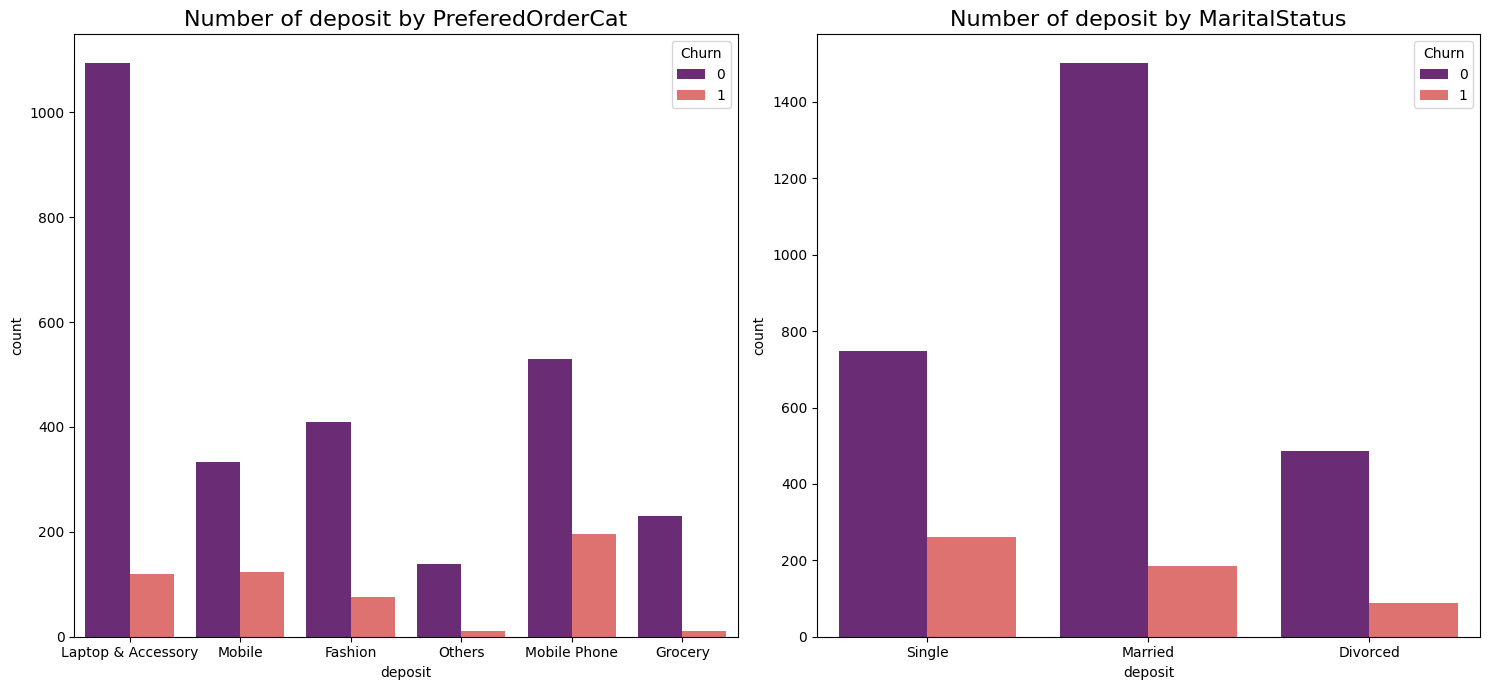

In [105]:
plt.figure(figsize=(15,7))
plotnumber = 1

for feature in categorical_features:
    ax = plt.subplot(1, 2, plotnumber)
    sns.countplot(data = df, x = feature, hue = 'Churn', palette='magma')
    plt.xlabel('deposit')
    plt.title(f'Number of deposit by {feature}', fontsize=16)
    plotnumber += 1
    plt.tight_layout();

Terihat dari visualisasi di atas bahwa data pada kategorikal terlihat data imbalance karena adanya ketidak seimbangan antara yang churn dan tidak churn

### **Numerical Variable vs Target**

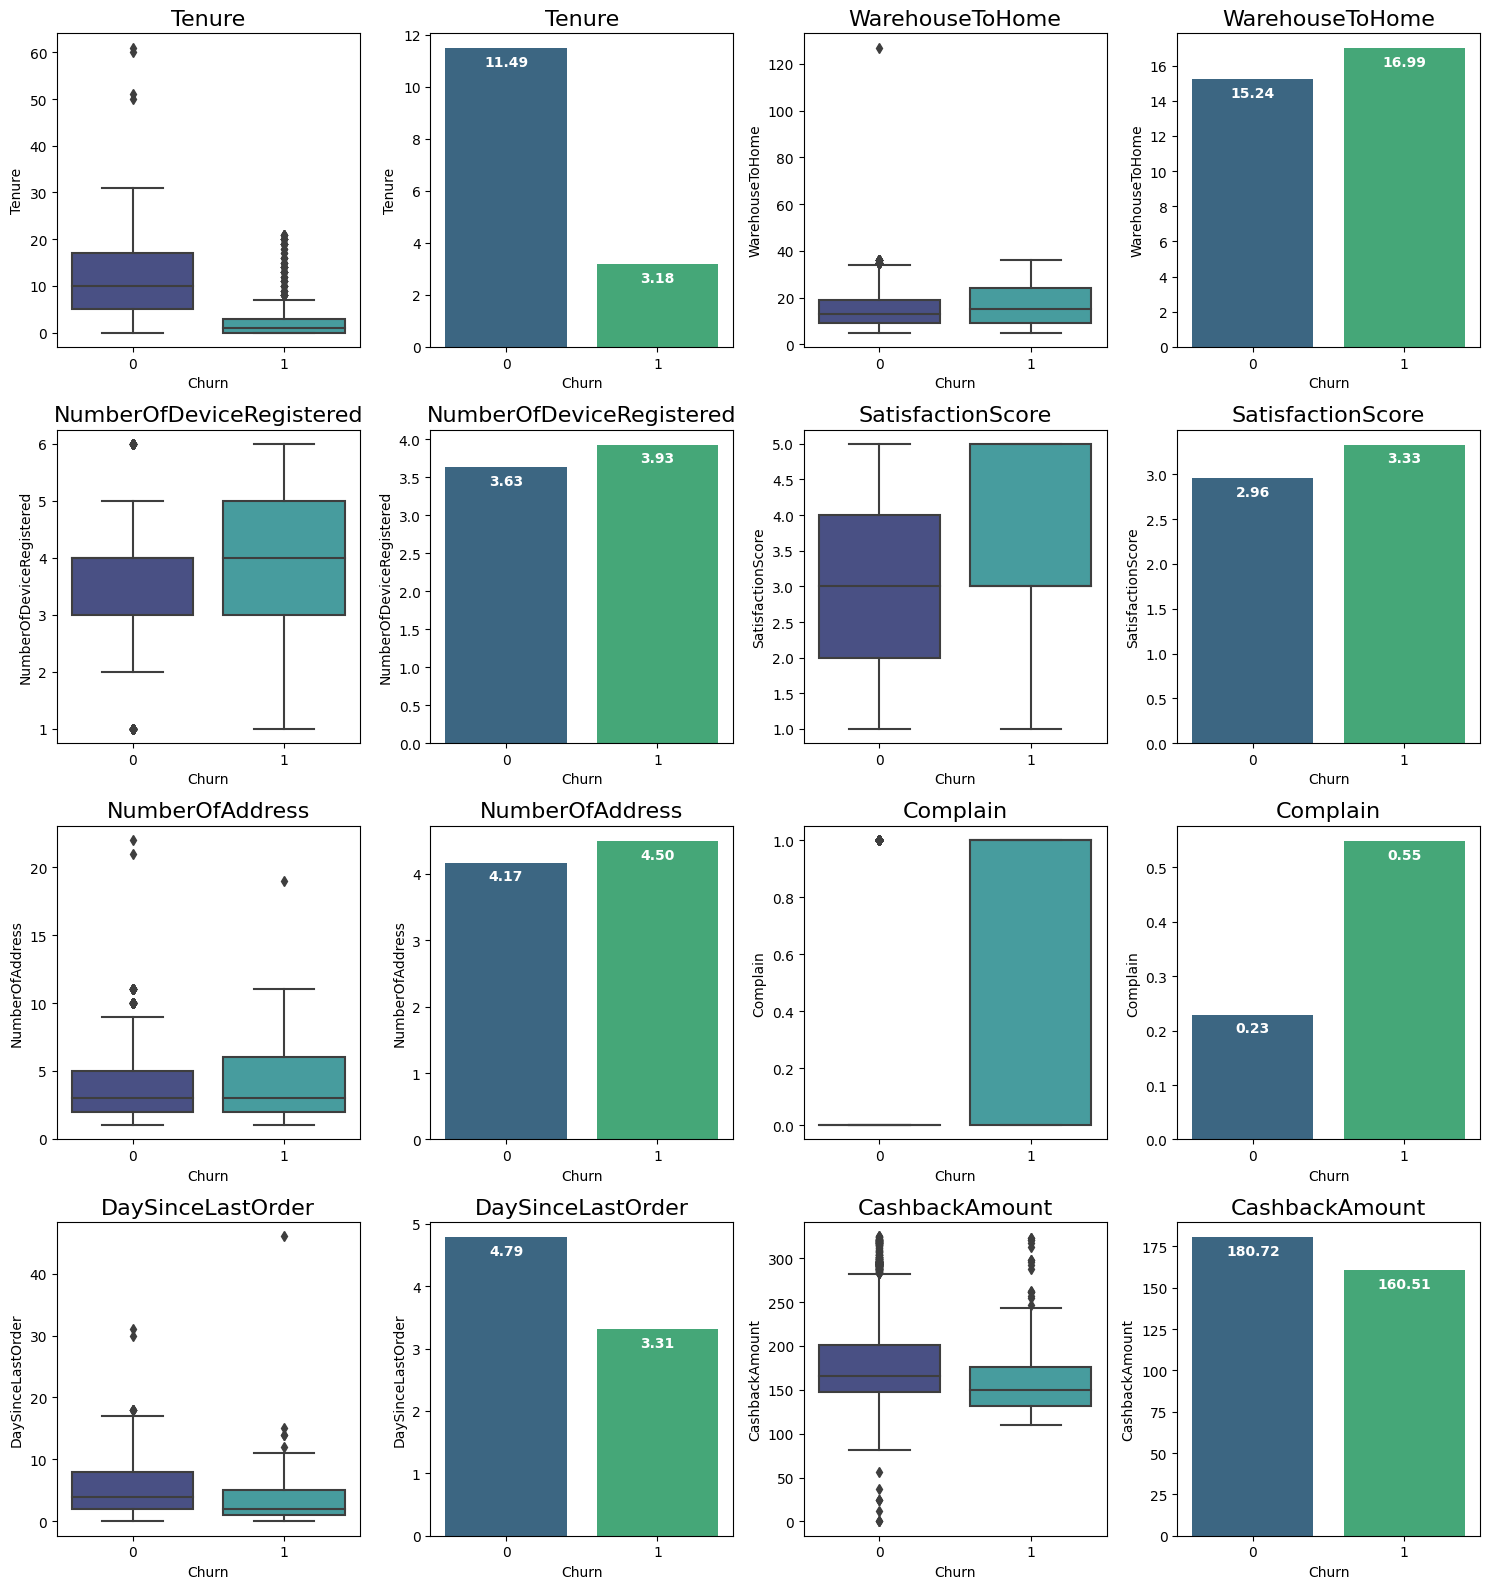

In [106]:
plt.figure(figsize=(15, 16))


# Mengatur posisi subplot
plotnumber = 1
plotnumber2 = 2

for feature in numerical_features:
    plt.subplot(4, 4, plotnumber)
    sns.boxplot(data=df, y=feature, x='Churn', palette='mako');
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    # plotnumber = plotnumber + 1

# for feature in numerical_features:
    plt.subplot(4, 4, plotnumber2)
    sns.barplot(data=df, y=feature, x='Churn', palette='viridis', errorbar=None)
    
    # Menambahkan label pada bar
    for container in plt.gca().containers:
        plt.gca().bar_label(container, labels=[f'{x:,.2f}' for x in container.datavalues], label_type='edge', padding=-15, color="white", fontweight='bold')
    
    plt.title(feature, fontsize=16)
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.tight_layout()
    plotnumber += 2
    plotnumber2 += 2

plt.show()
    

## **MODELING**

### **Data Preparation**

#### **PreferedOrderCat**

In [108]:
for column in categorical_features:
    print(f'Nilai Unique {column}: ', df[column].unique())

Nilai Unique PreferedOrderCat:  ['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']
Nilai Unique MaritalStatus:  ['Single' 'Married' 'Divorced']


Pada nilai unique di PrefferedOrderCat ada Mobile dan Mobile Phone, karena merupakan jenis yang sama makan akan disatukan menjadi satu kelompok menjadi Mobile

In [109]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile Phone':'Mobile'})

In [110]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others', 'Grocery'],
      dtype=object)

#### **Imbalance Data**

In [111]:
# Data Imbalance
df['Churn'].value_counts() * 100 / len(df['Churn'])

Churn
0    83.669725
1    16.330275
Name: count, dtype: float64


| Degree of imbalance	| Proportion of Minority Class |
| --- | --- |
| Mild | 20-40% of the data set |
| Moderate | 1-20% of the data set |
| Extreme | <1% of the data set |

Berdasarkan Informasi diatas [data merupakan data imbalance](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data) kategori moderate karena sebesar 16% adalah kelas minoritas

In [112]:
df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

Karena data imbalance dikhawatirkan pada saat modeling akan terlalu banyak data belajar pada kelas mayoritas sehingga data kelas mayoritas sangat sedikit untuk dapat dipelajari Machine Learning.
Dilakukan resampler untuk penyeimbang data minoritas menggunakan SMOTENC dengan membuat data sintetis untuk feature numerical dan kategorikal

In [113]:
# resampler
resample = SMOTENC(categorical_features=[3, 5], random_state=0)

### **Encoding**

In [114]:
# menampilkan jumlah unik dan unique values untuk setiap kolom
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in categorical_features :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,PreferedOrderCat,5,"[Fashion, Grocery, Laptop & Accessory, Mobile, Others]"
1,MaritalStatus,3,"[Divorced, Married, Single]"


- Merubah features `'PreferedOrderCat'` menggunakan *OneHotEncoders* karena tidak memiliki urutan/ordinal dan data unique hanya sedikit
- Encoding dilakukan agar model dapat berjalan pada kolom kategorikal karena pada saat modeling, model hanya dapat membaca data dalam kolom hanya berupa numerikal

### **Imputer**

In [115]:
df.isna().sum()

Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [116]:
transformer = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
    ('simple_iterative', SimpleImputer(strategy='median'), ['Tenure','WarehouseToHome', 'DaySinceLastOrder'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_encoder', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('simple_iterative',
                                 SimpleImputer(strategy='median'),
                                 ['Tenure', 'WarehouseToHome',
                                  'DaySinceLastOrder'])])

'Tenure', 'WarehouseToHome', 'DaySinceLastOrder' Merupakan kolom numerikal dengan distribusi data tidak normal pada visualisasi dan analisis pada EDA sehinggai diputuskan untuk menigisi missing value menggunakan nilai mediannya dengan simple imputer

### **Scaling**

- Pada pembuatan model machine learning kita akan menggunakan algoritma Logistic Regression dan KNN maka kita akan menerapkan scaling. Karena KNN dan logistic regression merupakan model yang memanfaatkan jarak, sehingga melakukan scaling dihrapkan dapat menambah kinerja modeling yang memanfaatkan jarak
- Kemudian karena data pada kolom numerikal hampir semua terdapat outlier pada saat di cek visualisasi menggunaka boxplot, maka kita akan menggunakan RobustScaler() karena lebih stabil pada data yang terdapat outlier

In [117]:
scaler = RobustScaler()
scaler

RobustScaler()

### **Define X dan y**

Selanjutnya kita definisikan feature dan targetnya :
- feature : `'Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount'`
- target : `Churn`

In [118]:
# define fetures and target
X = df.drop(columns = ['Churn'])
y = df['Churn']

### **Data Splitting**

Untuk pemodelan ini kita akan menggunakan test size = 0.2 sehingga data testing adalah sebesar 20% dari keseluruhan dataset.

Karena kita akan menggunakan Classification untuk memprediksi data atau label yang sifatnya kategorik, maka kita menggunakan stratify=y agar proporsi nilai Churn pada y_train dan y_test sama.

In [119]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2, stratify=y)

In [120]:
y_train.value_counts() / len(y_train)

Churn
0    0.836774
1    0.163226
Name: count, dtype: float64

In [121]:
y_test.value_counts() / len(y_test)

Churn
0    0.836391
1    0.163609
Name: count, dtype: float64

## **MODELING & EVALUATION**

In [122]:
## ML Algo
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
grad = GradientBoostingClassifier(random_state=0)
cat = CatBoostClassifier(verbose=False,random_state=0)
xgb = XGBClassifier(random_state=0)
lgbm = LGBMClassifier(random_state=0)

In [123]:
# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Scoring
f2 = make_scorer(fbeta_score, beta=2)

### **MODEL BENCHMARKING** 

In [124]:
# untuk menyatukan resampler dan function dari sklearn
from imblearn.pipeline import Pipeline

In [133]:
models = [logreg, knn, tree, rf, ada, grad, cat, xgb, lgbm]

list_mean_with_sampling = []
list_std_with_sampling = []
list_mean_without_sampling = []
list_std_without_sampling = []

for model in  models :

    # modeling with oversampling
    pipe_model_with_sampling = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', resample),
        ('algo', model)
    ])

    model_cv_with_sampling = cross_val_score(
        estimator = pipe_model_with_sampling,
        X = X_train,
        y = y_train,
        cv = skf,
        scoring = f2,
        n_jobs = -1
    )
    list_mean_with_sampling.append(model_cv_with_sampling.mean())
    list_std_with_sampling.append(model_cv_with_sampling.std())

    # modeling without oversampling

    pipe_model_without_sampling = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('algo', model)
    ])

    model_cv_without_sampling = cross_val_score(
        estimator = pipe_model_without_sampling,
        X = X_train,
        y = y_train,
        cv = skf,
        scoring = f2,
        n_jobs = -1
    )
    list_mean_without_sampling.append(model_cv_without_sampling.mean())
    list_std_without_sampling.append(model_cv_without_sampling.std())

In [135]:
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'mean_f2score_with_sampling' : list_mean_with_sampling,
    'mean_f2score_without_sampling' : list_mean_without_sampling,
    'std_f2score_with_sampling' : list_std_with_sampling,
    'std_f2score_without_sampling' : list_std_without_sampling,
}).sort_values('mean_f2score_with_sampling', ascending=False)

,model,mean_f2score_with_sampling,mean_f2score_without_sampling,std_f2score_with_sampling,std_f2score_without_sampling
7,XGBoost,0.711454,0.702854,0.034526,0.044644
6,CatBoost,0.703608,0.658183,0.032172,0.043180
8,LightGBM,0.694910,0.669351,0.026084,0.035586
3,Random Forest,0.694786,0.609609,0.027100,0.035092
5,GradienBoost,0.681356,0.596348,0.013484,0.036827
0,Logistic Regression,0.680997,0.473047,0.032383,0.045598
1,KNN,0.675569,0.386648,0.026747,0.053005
4,AdaBoost,0.662619,0.590515,0.018439,0.026095
2,Decision Tree,0.635506,0.666435,0.017330,0.043791


- Diketahui dari data diatas nilai yang terbaik merupakan XGBoost, Catboost, LightGBM, dan RandomForest. 
- Namun pada Data terlihat bawa kemipiran XGBoost dan CatBoost memiliki nilai baik pada mean
- Kemipiripan juga terjadi pada LightGBM dan Random Forest memiliki nilai terbaik pada standar deviasiA
- Sehingga penulis memutuskan untuk menggunakan XGBoost dan LightGBM untuk dilakukan Hyperparameter Space untuk mencari model yang terbaik

### **TRAIN & TEST DATA**

In [136]:
models = [logreg, knn, tree, rf, ada, grad, cat, xgb, lgbm]
score_f2_test = []
score_f2_train = []

def y_pred_func(model):
    estimator = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', resample),
        ('algo', model)
    ])
    
    estimator.fit(X_train,y_train)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    score_f2_test.append(fbeta_score(y_test,y_pred_test, beta=2))
    score_f2_train.append(fbeta_score(y_train,y_pred_train, beta=2))

[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2166
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
             'f2 score (train set)': score_f2_train,
             'f2 score (validation set)': list_mean_with_sampling,
             'f2 score (test set)': score_f2_test}).set_index('model').sort_values(by='f2 score (validation set)',ascending=False)

,f2 score (train set),f2 score (validation set),f2 score (test set)
model,,,
XGBoost,0.998126,0.711454,0.718232
CatBoost,0.919325,0.703608,0.719557
LightGBM,0.962529,0.694910,0.727440
Random Forest,1.000000,0.694786,0.740741
GradienBoost,0.767123,0.681356,0.731922
Logistic Regression,0.695825,0.680997,0.716487
KNN,0.873216,0.675569,0.710824
AdaBoost,0.705548,0.662619,0.715474
Decision Tree,1.000000,0.635506,0.686275


Pada train dan test data terlihat masih tidak terlihat perubahan, maka setiap model ada di hyperparameter dengan perlakuan kondisi berbeda sesuai modelnya dan dicari metriks nilai F2 yang terbaik

## **HYPERPARAMETER MODEL**

In [ ]:
## hyperparameter dan model yang akan dipakai

param_logreg = {'algo__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
param_knn = {'algo__n_neighbors' : range(1,22,2)}
param_tree = {'algo__max_depth' : range(1,10,1)}
param_rf = {'algo__max_features' : range(1,6,1)}
param_ada = {'algo__learning_rate' : [0.001, 0.01, 0.1]}
param_grad = {'algo__learning_rate' : [0.001, 0.01, 0.1]}
param_cat = {'algo__scale_pos_weight' : [2, 3, 5, 10, 20, 30]}
param_xgb = {'algo__scale_pos_weight' : [2, 3, 5, 10, 20, 30]}
param_lgbm = {'algo__scale_pos_weight' : [2, 3, 5, 10, 20, 30]}

models = [logreg, knn, tree, rf, ada, grad, cat, xgb, lgbm]
params = [param_logreg, param_knn, param_tree, param_rf, param_ada, param_grad, param_cat, param_xgb, param_lgbm]

In [ ]:
# menentukan best params dan best score untuk masing masing model

list_best_param = []
list_best_score = []

for model, param in zip(models,params):
    ## hyperparameter 
    hyperparam_space = param

    # GridSearch CV
    benchmark_model = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', resample),
        ('algo', model)
    ])

    grid_search = GridSearchCV(
        estimator = benchmark_model,
        param_grid=hyperparam_space,
        cv=skf,
        scoring=f2,
        n_jobs=-1,
    )

    grid_search.fit(X_train, y_train)
    list_best_param.append(grid_search.best_params_)
    list_best_score.append(grid_search.best_score_)

[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2166
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
             'best param': list_best_param,
             'best f2 score': list_best_score}).sort_values('best f2 score', ascending=False)

,model,best param,best f2 score
8,LightGBM,{'algo__scale_pos_weight': 20},0.797154
6,CatBoost,{'algo__scale_pos_weight': 5},0.785708
7,XGBoost,{'algo__scale_pos_weight': 30},0.776253
3,Random Forest,{'algo__max_features': 4},0.734189
4,AdaBoost,{'algo__learning_rate': 0.1},0.689623
2,Decision Tree,{'algo__max_depth': 6},0.688946
5,GradienBoost,{'algo__learning_rate': 0.1},0.681344
0,Logistic Regression,{'algo__solver': 'newton-cg'},0.680997
1,KNN,{'algo__n_neighbors': 5},0.675569


Setelah dilakukan tuning dengan salah satu parameter penting setiap model dasar. Hasil LightGBM adalah yang terbaik dan akan dilakukan hyperparameter tuning dan menggunakan XGBoost sebagai pembanding karena model CatBoost memiliki waktu render yang sangat lama untuk komponen yang kurang mendukung yang digunakan penulis.

### **XGBOOST Classifier**

First Tuning

In [ ]:
## hyperparameter untuk XGB
hyperparam_space = {
    'algo__scale_pos_weight': [2, 3, 5, 10, 20, 30],
    'algo__learning_rate': [0.01, 0.05, 0.1],
    'algo__max_depth': range(1, 30)
}

# RandomizedSearch CV

benchmark_model = Pipeline([
    ('prep', transformer),
    ('scaler', scaler),
    ('resample', resample),
    ('algo', XGBClassifier(random_state=0))
])

random_search_xgb = RandomizedSearchCV(
    estimator = benchmark_model,
    param_distributions=hyperparam_space,
    cv=skf,
    scoring=f2,
    n_jobs=-1,
    n_iter = 300,
    random_state = 0
)

random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus']),
                                                                              ('simple_iterative',
                                                                               SimpleImputer(strategy='median'),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLas...
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=0, ...))]),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'algo__learning_rate': [0.01, 0.05,
                                                                0.1],
                                        'algo__max_depth': range(1, 30),
                                        'algo__scale_pos_weight': [2, 3, 5, 10,
                                                                   20, 30]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
random_search_xgb.best_score_

0.7997263203598974

In [ ]:
random_search_xgb.best_params_

{'algo__scale_pos_weight': 10,
 'algo__max_depth': 8,
 'algo__learning_rate': 0.1}

- Terlihat bahwa model XGBoost setelah kita tuning hyperparameternya memiliki nilai f2 score meningkat. Namun di butuhkan parameter tambahan lain agar model jauh lebih baik pada saat melaakukan test
 - Best F2 score XGBoost : 79.97%

Tuning 2

In [ ]:
## hyperparameter untuk XGB
hyperparam_space = {
    'algo__scale_pos_weight': [10],
    'algo__learning_rate': [0.01, 0.1, 0.2, 0.5, 1],
    'algo__max_depth': range(8, 15),
    'algo__subsample': [0.8, 0.9, 1.0],
    'algo__colsample_bytree': [0.8, 0.9, 1.0],
    'algo__reg_alpha': [0, 0.001, 0.01, 0.1],
    'algo__reg_lambda': [0, 0.001, 0.01, 0.1],
    'algo__n_estimators': [100, 200, 300]
}

# RandomizedSearch CV

benchmark_model = Pipeline([
    ('prep', transformer),
    ('scaler', scaler),
    ('resample', resample),
    ('algo', XGBClassifier(random_state=0))
])

random_search_xgb = RandomizedSearchCV(
    estimator = benchmark_model,
    param_distributions=hyperparam_space,
    cv=skf,
    scoring=f2,
    n_jobs=-1,
    n_iter = 300,
    random_state = 0
)

random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus']),
                                                                              ('simple_iterative',
                                                                               SimpleImputer(strategy='median'),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLas...
                   param_distributions={'algo__colsample_bytree': [0.8, 0.9,
                                                                   1.0],
                                        'algo__learning_rate': [0.01, 0.1, 0.2,
                                                                0.5, 1],
                                        'algo__max_depth': range(8, 15),
                                        'algo__n_estimators': [100, 200, 300],
                                        'algo__reg_alpha': [0, 0.001, 0.01,
                                                            0.1],
                                        'algo__reg_lambda': [0, 0.001, 0.01,
                                                             0.1],
                                        'algo__scale_pos_weight': [10],
                                        'algo__subsample': [0.8, 0.9, 1.0]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
random_search_xgb.best_score_

0.8026291909307032

In [ ]:
random_search_xgb.best_params_

{'algo__subsample': 0.8,
 'algo__scale_pos_weight': 10,
 'algo__reg_lambda': 0,
 'algo__reg_alpha': 0.1,
 'algo__n_estimators': 300,
 'algo__max_depth': 13,
 'algo__learning_rate': 0.01,
 'algo__colsample_bytree': 0.8}

Tuning kedua memberikan hasil yang lebih baik dibanding tuning pertama dengan perubahan nilai :
- 79.97% Pada tuning pertama
- 80.26% Pada Final tuning

**XGBoost Best Estimator Train to Test Set**

In [ ]:
# best model
xgbc_tuning = random_search_xgb.best_estimator_

# fitting
xgbc_tuning.fit(X_train, y_train)

# predict
y_pred_xgbc_tuning = xgbc_tuning.predict(X_test)

# f2 score
f2score_xgbc_tuning = fbeta_score(y_test, y_pred_xgbc_tuning, beta=2)
f2score_xgbc_tuning

0.7580919931856899

- Data benchmark model pada XGBoost Sebelum tuning 77A% dan meningkat menjadi 80.26% setelah tuning.
- Hasil tuning tersebut di coba ke test set dan mengalami penurunan sekitar 4.66%

| Xgboost Tuning | F2 Score |
| --- | --- |
| Train |80.26% |
| Test | 75.80% |

Dari data di atas terlihat bahwa model ini memiliki perbedaan yang sedikit mencolok untuk train ke test set

### **LIGHTGBM**

Final Tuning

In [ ]:
## hyperparameter untuk LightGBM
hyperparam_space = {
    'algo__scale_pos_weight' : [2, 3, 5, 10, 20, 30],
    'algo__learning_rate' : [0.001, 0.01, 0.05, 0.1, 1],
    'algo__max_depth' : range(1,30),
    'algo__subsample': [0.8, 0.9, 1.0],
    'algo__colsample_bytree': [0.8, 0.9, 1.0],
    'algo__reg_alpha': [0, 0.001, 0.01, 0.1],
    'algo__reg_lambda': [0, 0.001, 0.01, 0.1],
    'algo__n_estimators': [100, 200, 300]
}

# RandomizedSearch CV

benchmark_model = Pipeline([
    ('prep', transformer),
    ('scaler', scaler),
    ('resample', resample),
    ('algo', LGBMClassifier(random_state=0))
])

random_search_lgbm = RandomizedSearchCV(
    estimator = benchmark_model,
    param_distributions=hyperparam_space,
    cv=skf,
    scoring=f2,
    n_jobs=-1,
    n_iter = 300,
    random_state = 0
)

random_search_lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2166
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus']),
                                                                              ('simple_iterative',
                                                                               SimpleImputer(strategy='median'),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLas...
                   param_distributions={'algo__colsample_bytree': [0.8, 0.9,
                                                                   1.0],
                                        'algo__learning_rate': [0.001, 0.01,
                                                                0.05, 0.1, 1],
                                        'algo__max_depth': range(1, 30),
                                        'algo__n_estimators': [100, 200, 300],
                                        'algo__reg_alpha': [0, 0.001, 0.01,
                                                            0.1],
                                        'algo__reg_lambda': [0, 0.001, 0.01,
                                                             0.1],
                                        'algo__scale_pos_weight': [2, 3, 5, 10,
                                                                   20, 30],
                                        'algo__subsample': [0.8, 0.9, 1.0]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
random_search_lgbm.best_score_

0.7973453861029368

In [ ]:
random_search_lgbm.best_params_

{'algo__subsample': 1.0,
 'algo__scale_pos_weight': 30,
 'algo__reg_lambda': 0.001,
 'algo__reg_alpha': 0.1,
 'algo__n_estimators': 200,
 'algo__max_depth': 12,
 'algo__learning_rate': 0.05,
 'algo__colsample_bytree': 0.8}

- Terlihat bahwa model LightGBM setelah kita tuning hyperparameternya memiliki nilai f2 score meningkat kecil model sudah sangat stabil.
 - Best F2 score LightGBM : 79.97%
 - Before tuning LightGBM : 79.71%

****LightGBM Best Estimator Train to Test Set****

In [ ]:
# best model
lgbm_tuning = random_search_lgbm.best_estimator_

# fitting
lgbm_tuning.fit(X_train, y_train)

# predict
y_pred_lgbm_tuning = lgbm_tuning.predict(X_test)

# f2 score
f2score_lgbm_tuning = fbeta_score(y_test, y_pred_lgbm_tuning, beta=2)
f2score_lgbm_tuning

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2166
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.7860615883306322

- Data benchmark model pada LightGBM Setelah menggunakan hyperparameter 79.71% dan meningkat menjadi 79.97% setelah Final tuning.
- Hasil tuning tersebut di coba ke test set dan mengalami penurunan sekitar 1.2%

| LightGBM Tuning | F2 Score |
| --- | --- |
| Train |79.97% |
| Test | 78.60% |

Dari data di atas terlihat bahwa model ini memiliki perbedaan tidak berbeda jauh untuk train ke test set

### **Perbandingan Best Model XGBoost & LightGBM**

Secara umum, hasil pemodelan antara model XGboost dan LightGBM dapat dilihat sebagai berikut :

In [ ]:
# membuat tabulasi f2 score
df_score = pd.DataFrame({
    'XGBoost' : [list_best_score[7], random_search_xgb.best_score_, fbeta_score(y_test, y_pred_test, beta=2), fbeta_score(y_test, y_pred_xgbc_tuning, beta=2)],
    'LightGBM' : [list_best_score[8], random_search_lgbm.best_score_, fbeta_score(y_test, y_pred_test, beta=2), fbeta_score(y_test, y_pred_lgbm_tuning, beta=2)]
})

# untuk label index
outside = ['Train Set', 'Train Set', 'Test Set', 'Test Set',] 
inside = ['Benchmark Model', 'Tuning Model', 'Benchmark Model', 'Tuning Model']

# memasangkan item pada index yang sama dari 2 list
hier_index = list(zip(outside, inside))

# membuat multiindex 
multi = pd.MultiIndex.from_tuples(hier_index)


In [ ]:
# mengubah lavel index lama menjadi multi-index yang telah kita buat di atas
df_score.index = multi
df_score

XGBoost  LightGBM
Train Set Benchmark Model  0.776253  0.797154
          Tuning Model     0.802629  0.797345
Test Set  Benchmark Model  0.727440  0.727440
          Tuning Model     0.758092  0.786062

In [129]:
# Best Model terbaik dan paling stabil yang dipili adalah LightGBM
lgbm_best = random_search_lgbm.best_estimator_

# fitting
lgbm_best.fit(X_train, y_train)

# predict
y_pred_lgbm_best = lgbm_tuning.predict(X_test)

# f2 score
f2score_lgbm_best = fbeta_score(y_test, y_pred_lgbm_tuning, beta=2)
f2score_lgbm_best

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2166
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.7860615883306322

Pada perbandingan kedua model tersebut terlihat model yang baik dan cukup stabil adalah LightGBM. Sehingga model tesebut akan dipilih menjadi Best model pada dataset e-commerce ini

## **Feature Importance**

**XGB**

In [ ]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_encoder', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('simple_iterative',
                                 SimpleImputer(strategy='median'),
                                 ['Tenure', 'WarehouseToHome',
                                  'DaySinceLastOrder'])])

In [ ]:
feature_onehot = list(xgbc_tuning['prep'].transformers_[0][1].get_feature_names_out())
feat_impute = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']
feature_remainder = list(X.columns[xgbc_tuning['prep'].transformers_[2][2]])
feature_names = feature_onehot + feat_impute + feature_remainder
feature_names

['PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile',
 'PreferedOrderCat_Others',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Tenure',
 'WarehouseToHome',
 'DaySinceLastOrder',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'CashbackAmount']

In [ ]:
feature_importance = xgbc_tuning['algo'].feature_importances_
feature_imp_dict = dict(zip(feature_names, feature_importance.flatten()))
df_importances = pd.DataFrame(list(feature_imp_dict.items()), columns=['Feature', 'Coefficient']).sort_values('Coefficient', ascending=False)
df_importances

,Feature,Coefficient
12,Complain,0.318893
6,Tenure,0.114527
1,PreferedOrderCat_Laptop & Accessory,0.081159
0,PreferedOrderCat_Grocery,0.078824
4,MaritalStatus_Married,0.075205
2,PreferedOrderCat_Mobile,0.055994
3,PreferedOrderCat_Others,0.042001
10,SatisfactionScore,0.040648
11,NumberOfAddress,0.036399
8,DaySinceLastOrder,0.035430


In [ ]:
feature_importance

array([0.07882356, 0.08115935, 0.05599406, 0.0420009 , 0.07520497,
       0.02937486, 0.11452742, 0.02685725, 0.03543046, 0.0331247 ,
       0.04064807, 0.03639869, 0.31889328, 0.03156241], dtype=float32)

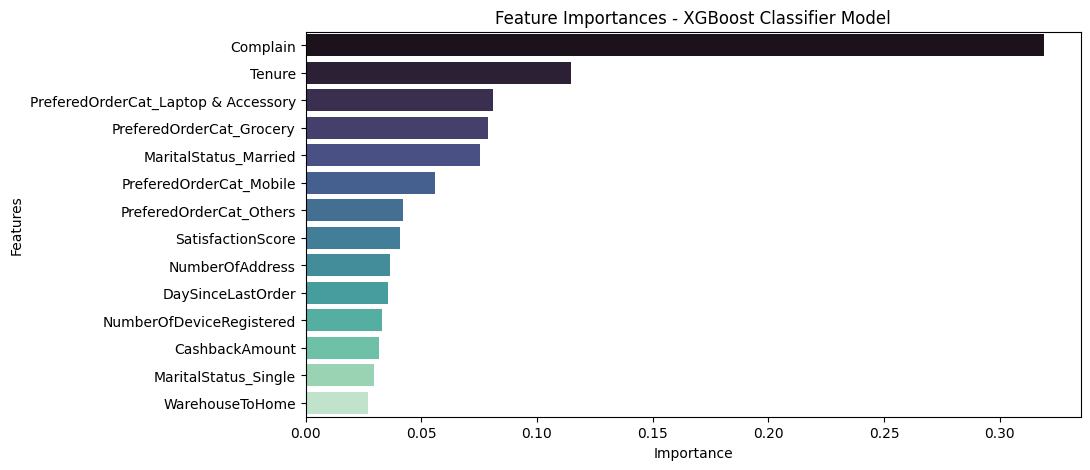

In [ ]:
coef1 = pd.Series(xgbc_tuning['algo'].feature_importances_, feature_names).sort_values(ascending = False)
coef1
plt.figure(figsize=(10, 5))
sns.barplot(x=coef1.values, y=coef1.index, palette="mako")
plt.title('Feature Importances - XGBoost Classifier Model')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()

Feature Importance - XGBoost Clasifier
- Complain merupakan fitur importance tertinggi dengan koefisien 0.31 
- Tenure merupakan yang kedua tertinggi dengan koefisien 0.114
- fitur importance ini menentukan fitur untuk menilai apakah mengurangi fitur yang tidak terlalu penitng mengurani persentase model namun denan efisiensi waktu yang lebih cepat. ini harus dikaji ulang untuk memii jika fitur sangat banyak

LGBM

In [ ]:
feature_onehot = list(lgbm_tuning['prep'].transformers_[0][1].get_feature_names_out())
feat_impute = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']
feature_remainder = list(X.columns[lgbm_tuning['prep'].transformers_[2][2]])
feature_names = feature_onehot + feat_impute + feature_remainder
feature_names

['PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile',
 'PreferedOrderCat_Others',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Tenure',
 'WarehouseToHome',
 'DaySinceLastOrder',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'CashbackAmount']

In [ ]:
feature_importance2 = lgbm_tuning['algo'].feature_importances_
feature_imp_dict2 = dict(zip(feature_names, feature_importance2.flatten()))
df_importances2 = pd.DataFrame(list(feature_imp_dict2.items()), columns=['Feature', 'Coefficient']).sort_values('Coefficient', ascending=False)
df_importances2

,Feature,Coefficient
6,Tenure,947
13,CashbackAmount,935
11,NumberOfAddress,784
7,WarehouseToHome,744
8,DaySinceLastOrder,714
10,SatisfactionScore,586
9,NumberOfDeviceRegistered,407
12,Complain,268
4,MaritalStatus_Married,219
1,PreferedOrderCat_Laptop & Accessory,143


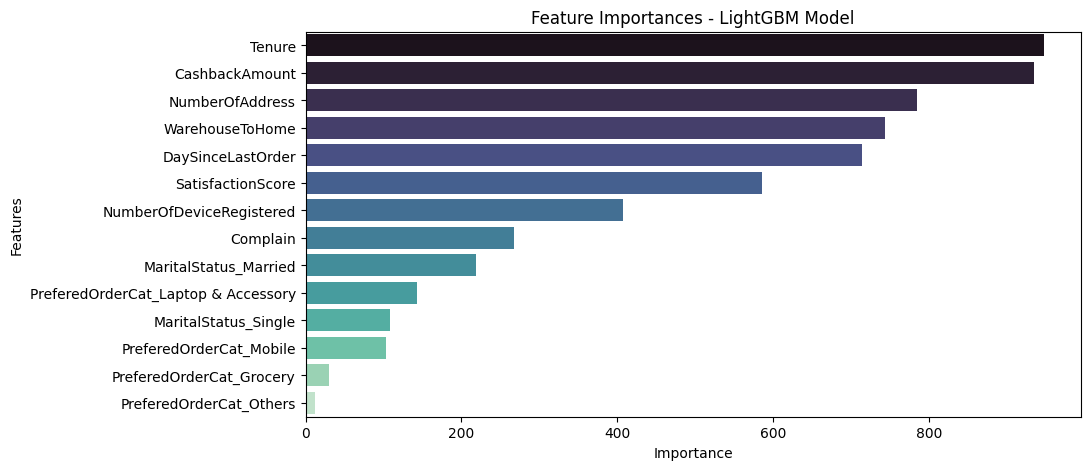

In [ ]:
coef2 = pd.Series(lgbm_tuning['algo'].feature_importances_, feature_names).sort_values(ascending = False)
coef2
plt.figure(figsize=(10, 5))
sns.barplot(x=coef2.values, y=coef2.index, palette="mako")
plt.title('Feature Importances - LightGBM Model')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()

Feature Importance - LightGBM
- Tenure merupakan fitur importance tertinggi dengan koefisien 947 
- CasbackAmount merupakan yang kedua tertinggi dengan koefisien 935
- fitur importance ini menentukan fitur untuk menilai apakah mengurangi fitur yang tidak terlalu penitng mengurani persentase model namun denan efisiensi waktu yang lebih cepat. ini harus dikaji ulang untuk memii jika fitur sangat banyak

### Shapley Value of Explanations (SHAP)

**XGB Classifier**

In [ ]:
import shap
my_model = xgbc_tuning[-1]
my_data = xgbc_tuning[0].fit_transform(X_train)

# define explainer
explainer = shap.TreeExplainer(
    model = my_model,
    data = my_data
)

# count shap value for every line in data train
shap_values = explainer.shap_values(my_data)

 98%|===================| 2553/2616 [00:40<00:00]        

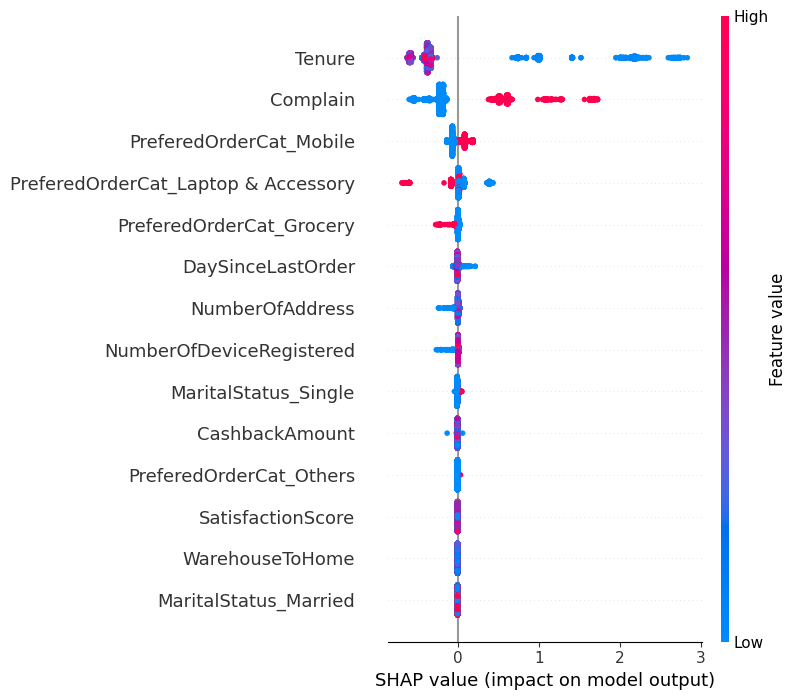

In [ ]:
# show most important feature affect the churn
shap.summary_plot(shap_values, my_data, feature_names = feature_names)

Fitur yang penting dalam menggunakan SHAP value di antaranya :
- Tenure : Pelanggan dengan Tenure yang kecil cenderung akan melakukan churn dibanding dengan "Tenure" besar atau sedang
- Complain : Pelanggan yang complain akan memiliki kesempatan lebih besar untuk churn
- PreferedOrderCat : Pelanggan yang preferensinya order barang mobile/phone memiliki kesempatn churn lebih besar sedikit dibanding order kategori lainnya selain Mobile

**LGBM** 

In [ ]:
my_model = lgbm_tuning[-1]
my_data = lgbm_tuning[0].fit_transform(X_train)

# define explainer
explainer = shap.TreeExplainer(
    model = my_model,
    data = my_data
)

# count shap value for every line in data train
shap_values = explainer.shap_values(my_data)

 94%|=================== | 2455/2616 [00:14<00:00]       

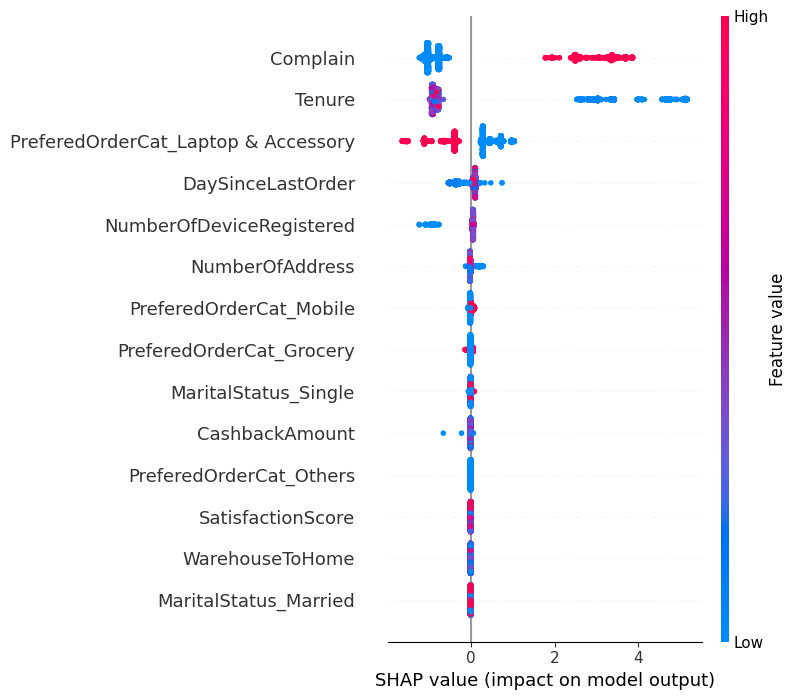

In [ ]:
# show most important feature affect the churn
shap.summary_plot(shap_values, my_data, feature_names = feature_names)

Fitur yang penting dalam menggunakan SHAP value di antaranya :
- Tenure : Pelanggan dengan Tenure yang kecil cenderung akan melakukan churn dibanding dengan "Tenure" besar
- Complain : Pelanggan yang complain akan memiliki kesempatan lebih besar untuk churn
- PreferedOrderCat : Pelanggan yang preferensinya order barang kategori Laptop & Accesory memiliki kesempatn churn LEBIH SEDIKIT dibanding order kategori lainnya selain Laptop&Accesorry

Berikut Merupakan contoh penerapan pada dataset

### **Confusion Matrix**

### **XGBC**

In [ ]:
print(classification_report(y_test, y_pred_xgbc_tuning))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92       547
           1       0.56      0.83      0.67       107

    accuracy                           0.87       654
   macro avg       0.76      0.85      0.79       654
weighted avg       0.90      0.87      0.88       654



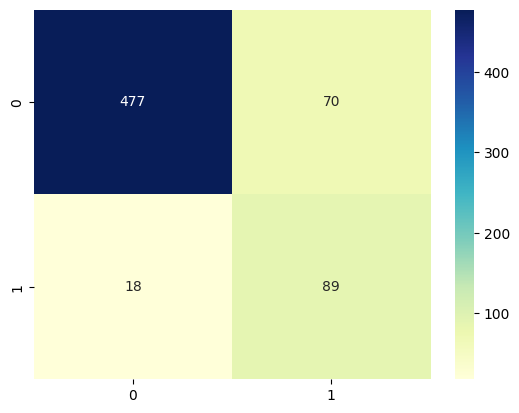

In [ ]:
confusion_matrix(y_test, y_pred_xgbc_tuning)
sns.heatmap(confusion_matrix(y_test, y_pred_xgbc_tuning), annot=True, fmt='g', cmap='YlGnBu');

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model LightGBM yang telah kita buat didapati:
- Pelanggan E-commerce aktualnya churn dan diprediksi akan churn (True Positive) : 89 orang
- Pelanggan E-commerce aktualnya churn dan diprediksi tidak akan churn (False Negative) : 18 orang
- Pelanggan E-commerce aktualnya tidak churn dan diprediksi tidak akan churn (True Negative) : 477 orang
- Pelanggan E-commerce aktualnya tidak churn tetapi diprediksi akan churn (False Positive) : 70 orang
<br>Nilai<br>
- Pelanggan E-commerce diprediksi akan churn sebanyak 70 + 89 = 159 orang
- Pelanggan E-commerce diprediksi tidak churn sebanyak 477 + 18 = 566 orang

In [ ]:
# score
print('Recall:', recall_score(y_test, y_pred_xgbc_tuning))
print('Precision:', precision_score(y_test, y_pred_xgbc_tuning))
print('F2 score:', fbeta_score(y_test, y_pred_xgbc_tuning, beta=2))
print('Accuracy:', accuracy_score(y_test, y_pred_xgbc_tuning))

Recall: 0.8317757009345794
Precision: 0.559748427672956
F2 score: 0.7580919931856899
Accuracy: 0.8654434250764526


### **LGBM**

In [ ]:
print(classification_report(y_test, y_pred_lgbm_tuning))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       547
           1       0.51      0.91      0.66       107

    accuracy                           0.84       654
   macro avg       0.75      0.87      0.78       654
weighted avg       0.90      0.84      0.86       654



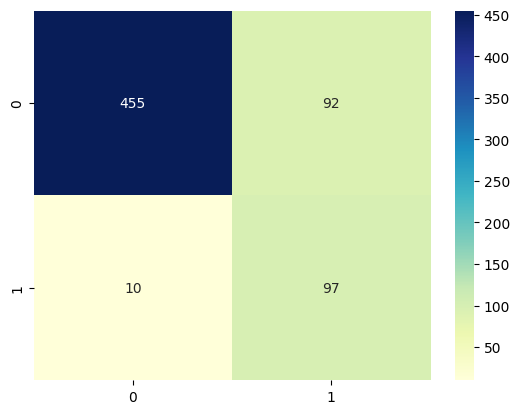

In [ ]:
confusion_matrix(y_test, y_pred_lgbm_tuning)
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm_tuning), annot=True, fmt='g', cmap='YlGnBu');

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model LightGBM yang telah kita buat didapati:
- Pelanggan E-commerce aktualnya churn dan diprediksi akan churn (True Positive) : 97 orang
- Pelanggan E-commerce aktualnya churn dan diprediksi tidak akan churn (False Negative) : 10 orang
- Pelanggan E-commerce aktualnya tidak churn dan diprediksi tidak akan churn (True Negative) : 455 orang
- Pelanggan E-commerce aktualnya tidak churn tetapi diprediksi akan churn (False Positive) : 92 orang
<br>Nilai<br>
- Pelanggan E-commerce diprediksi akan churn sebanyak 92 + 97 = 189 orang
- Pelanggan E-commerce diprediksi tidak a97 churn sebanyak 455 + 10 = 465 orang

In [ ]:
# score
print('Recall:', recall_score(y_test, y_pred_lgbm_tuning))
print('Precision:', precision_score(y_test, y_pred_lgbm_tuning))
print('F2 score:', fbeta_score(y_test, y_pred_lgbm_tuning, beta=2))
print('Accuracy:', accuracy_score(y_test, y_pred_lgbm_tuning))

Recall: 0.9065420560747663
Precision: 0.5132275132275133
F2 score: 0.7860615883306322
Accuracy: 0.8440366972477065


##### **`COST EVALUATION`**

Biaya

Berdasarkan asumsi yang telah disampaikan pada bagian Business Understanding, kita asumsikan dampak biayanya sebagai berikut :
- Biaya retensi per pelanggan ecommerce berdasarkan https://www.lifesight.io/glossary/customer-retention-cost --> $5 per bulan per pelanggan ecommerce
- Biaya akibat kehilangan pelanggan ecommerce (Churn) https://www.sellzone.com/churn-rate-in-ecommerce-complete-guide/ (5-25) time retensi diambil nilai tengah sekitar 15 --> $75 per bulan per pelanggan ecommerce (total pendapatan yang hilang dan biaya Customer Acquisition Cost)

Saat kita tidak menggunakan machine learning, kita tidak dapat memprediksi pelanggan ecommerce yang akan Churn atau tidak. Dampaknya adalah kita cenderung untuk memberi program retensi kepada seluruh pelanggan ecommerce.

Jumlah calon pelanggan ecommerce untuk dasar perhitungan :
- calon pelanggan ecommerce yang kita berikan program retensi = 654 orang
- calon pelanggan ecommerce yang aktualnya churn (FN+TP) 10 + 97 = 107 orang

Cost Estimation
- 654 orang x $5 per bulan per pelanggan ecommerce + 107 orang x $75 per bulan per pelanggan ecommerce = ($3270 + $7875/bulan = $11145 per bulan

Maka kerugiannya sekitar **$11145 per bulan** bila kita tidak menggunakan machine learning.

---
Saat kita menggunakan machine learning model **LightGBM**, kita hanya menawarkan program retensi ke calon pelanggan ecommerce yang diprediksi akan churn saja.

Jumlah calon pelanggan ecommerce untuk dasar perhitungan :
- calon pelanggan ecommerce yang kita berikan program retensi = TP + FP = 97 + 92 = 189 orang
- calon pelanggan ecommerce yang aktualnya churn = 107 orang

Cost Estimation
- 189 orang x $5 per bulan per pelanggan ecommerce + 107 orang x $105 per bulan per pelanggan ecommerce = ($945 + $7875)/bulan = $8820 per bulan

Maka kerugiannya sekitar **$8820 per bulan**

---
Penurunan Potential Loss = $11145 - $8820 = $2325 per bulan

**% Penurunan** = (2325 / 11145) x 100 = **20.86%**

Berdasarkan test set, model kita dapat menurunkan kerugian akibat churn hingga **20.86%** dalam sebulan.



In [134]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,3110.0,10.190354,8.650821,0.0,2.0000,9.000,16.0000,61.00
WarehouseToHome,3135.0,15.510367,8.568382,5.0,9.0000,13.000,20.0000,127.00
NumberOfDeviceRegistered,3270.0,3.676453,1.017390,1.0,3.0000,4.000,4.0000,6.00
SatisfactionScore,3270.0,3.020795,1.395113,1.0,2.0000,3.000,4.0000,5.00
NumberOfAddress,3270.0,4.222936,2.623195,1.0,2.0000,3.000,6.0000,22.00
Complain,3270.0,0.281651,0.449873,0.0,0.0000,0.000,1.0000,1.00
DaySinceLastOrder,3089.0,4.545484,3.696022,0.0,2.0000,3.000,7.0000,46.00
CashbackAmount,3270.0,177.417670,49.310647,0.0,145.8925,163.885,197.1375,324.99
Churn,3270.0,0.163303,0.369698,0.0,0.0000,0.000,0.0000,1.00


### **MODEL LIMITATION**

| Attribute | Data Type | Limitation |
| --- | --- | --- |
| Tenure | float | 0 - 61 |
| WarehouseToHome | float | 5 - 127 |
| NumberOfDeviceRegistered | int | 1 -6  |
| PreferedOrderCat | object | 'Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery' |
| SatisfactionScore | int | 1 - 5 |
| MaritalStatus | object | 'Single' 'Married' 'Divorced' |
| NumberOfAddress | int | 3 - 22 |
| Complain | int | 0 or 1 | 
| DaySinceLastOrder | float | 3 - 46 |
| CashbackAmount | float | 0 - 324.99 |
| churn | int | 0 or 1 |

## **KESIMPULAN DAN REKOMENDASI**

- Berdasarkan Modeling pada E-commerce customer churn ini menggunakan metrics utama F2 Score, Karena Pada model kali ini penulis berusaha menurunkan FN dibandingkan nilai FP yang parameternya lebih penting dua kali lipat untuk sisi bisnisnya
<br>
Berdasarkan hyperparameter tuning, parameter terbaik yang dapat digunakan untuk benchmark model LightGBM adalah :
    - 'subsample': 1.0,
    - 'scale_pos_weight': 30
    - 'reg_lambda': 0.001
    - 'reg_alpha': 0.1
    - 'n_estimators': 200
    - 'max_depth': 12
    - 'learning_rate': 0.05
    -'colsample_bytree': 0.8
    <br>

    <br>
    - Berdasarkan pemodelan **LightGBM**, fitur/kolom yang paling penting dan berpengaruh terhadap target (Churn) adalah `Tenure` kemudian diikuti dengan `CashbackAmount` dan `NumberOfAddress`.
    <br>

    <br>
- Interpretasi SHAP untuk model LightGBM :
    - Tenure : Pelanggan dengan Tenure yang kecil cenderung akan melakukan churn dibanding dengan "Tenure" besar
    - Complain : Pelanggan yang complain akan memiliki kesempatan lebih besar untuk churn
    - PreferedOrderCat : Pelanggan yang preferensinya order barang kategori Laptop & Accesory memiliki kesempatn churn LEBIH SEDIKIT dibanding order kategori lainnya selain Laptop&Accesorry
    <br>
    <br>
- Berdasarkan contoh perhitungan biaya :
    - Potensi kerugian yang mungkin didapat tanpa adanya penerapan machine learning diperkirakan sebesar : $11145 per bulan 
    - Potensi kerugian yang mungkin didapat dengan menerapkan model LightGBM yang telah dibuat diperkirakan sebesar : $8820 per bulan
    <br>
    <br>
- Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model kita, maka perusahaan dapat menghemat sebesar :
    - Dengan Model LightGBM : $ 2325 per bulan.
    - Mengingat pelanggan e-commerce merupakan sebuah bisnis yan biasanya banyak terjadi churn dan retention berulang maka model ini akan lebih menguntungkan untuk data yang sangat banyak


**Rekomendasi Aksi:**
- Loyalty Program: Fokus pada program loyalitas dengan insentif bagi pelanggan dengan Tenure tinggi untuk meningkatkan retensi.
- Optimalkan Logistik: Perbaiki logistik pengiriman guna mengurangi WarehouseToHome dan meningkatkan kepuasan pelanggan.
- Penawaran Khusus: Tawarkan penawaran eksklusif atau paket layanan untuk pelanggan dengan NumberOfDeviceRegistered tinggi.
- Personalisasi Pengalaman: Analisis PreferedOrderCat untuk menyusun tawaran khusus berdasarkan preferensi kategori pelanggan.
- Survei Kepuasan: Lakukan survei berkala untuk memahami faktor-faktor yang memengaruhi SatisfactionScore dan tingkatkan layanan.
- Strategi Pemasaran Berbasis Status Pernikahan: Sesuaikan strategi pemasaran dengan MaritalStatus pelanggan untuk menargetkan segmen yang sesuai.
- Personalisasi Layanan: Identifikasi preferensi dan kebutuhan pelanggan dengan NumberOfAddress tinggi untuk menyediakan layanan yang lebih baik.
- Penanganan Keluhan Cepat: Pantau dan tanggapi Complain pelanggan secara aktif untuk memulihkan kepercayaan dan mencegah churn.
- Promosi Berulang: Kembangkan program promosi untuk mendorong pelanggan dengan DaySinceLastOrder tinggi melakukan pemesanan lebih sering.
- Program Cashback: Tingkatkan atau kustomisasi program cashback berdasarkan CashbackAmount untuk meningkatkan keterlibatan pelanggan.

**Pengembangan Model:**
- Analisis Faktor Pengaruh: Perluasan analisis faktor pengaruh menggunakan model untuk mendalami pemahaman terhadap variabel yang memengaruhi churn.
- Personalisasi Strategi Retensi: Menerapkan strategi retensi yang dipersonalisasi berdasarkan hasil prediksi model untuk mengurangi churn.
- Pengembangan Fitur: Tambahkan fitur atau kolom baru yang dapat memberikan wawasan tambahan terhadap perilaku pelanggan.
- Peningkatan Data Minoritas: Perkaya data kelas minoritas (churn) untuk meningkatkan performa model khususnya dengan teknik oversampling yang sesuai.
- Penggunaan Algoritma Lain: Mengeksplorasi penggunaan algoritma lain dan hyperparameter tuning untuk meningkatkan performa model.
- Analisis Kesalahan Model: Menganalisis data yang salah tebak (False Negative dan False Positive) untuk memahami penyebab dan karakteristiknya.
- Implementasi rekomendasi dan pengembangan model dapat secara signifikan meningkatkan retensi pelanggan dan efektivitas strategi pencegahan churn di perusahaan e-commerce.

Melalui rekomendasi ini, diharapkan perusahaan dapat memaksimalkan retensi pelanggan, meningkatkan kualitas layanan, dan mengoptimalkan strategi pencegahan churn berdasarkan wawasan dari model machine learning.

## **Save Final Model**

In [138]:
import pickle

**LightGBM**

In [139]:
# fit
lgbm_best.fit(X, y)

# save with pickle
pickle.dump(lgbm_best, open('lgbm_best.sav', 'wb'))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2736, number of negative: 2736
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2161
[LightGBM] [Info] Number of data points in the train set: 5472, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
